# Introduction

The following project uses the concept of Word Embeddings to create an artificial personality that is interested in 'Health' related subjects. This project deals with text data and uses similarity measures to compute an interest score for a string input. Word Embeddings solve the generlisation issue that often occurs while mapping a set of words in a text or phrase to a vector, manually. Thus, word embeddings are a set of models that learn how to map a set of words to a vector of numerical values. We have used the Wordnet embedding method that uses the lexical database for the English Language.

**What are WordNet Embeddings?**

WordNet is a knowledge-based measure from the Princeton University, that quantifies semantic relatedness of words using a semantic network. In other words, information about a given word exists in the WordNet network in the form of synonyms, hypernyms, hyponyms, holonyms and meronyms. For example, when WordNet is used on the word 'Angry', it trains itself on its hierarchy or word relations. The similarity score between 'Angry' and 'Annoyed' will be high as they are synonyms. Similarly, 'Animal' is a hypernym of 'dog' i.e. 'dog' falls under the broader category 'Animal'. Therefore, wordnet uses word hierarchies to calcuate similarity score between the words of a sentence. There are several ways to calculate similarity, such as Path similarity, Wu and Palmer Metric and Resnik Metric. In this project, we have used the Wu & Palmer, also known as WUP Similarity, as it is a better metric that measures the semantic similarity of two concepts as their depth of the least common subsumer in a large corpus.   

**Wu & Palmer Similarity Formula:**

2*Depth(Least Common Subsumer)/(Depth(s1) + Depth(s2)),   0 < score <= 1  

# A Step-by-Step approach for building the persona:

**1. Text Preprocessing and Interest Score calculation**

Before calculating the semantic similarity between sentences, the first step is to perform text processing on the input string to remove punctuations, stop words and return a clean string in lower cases. We also perform tokenization to convert the string into a string of tokens or words that belong to our message. Once we have cleaned the text input, we map each of the Treebank part-of-speech tags to WordNet classes. WordNet has the part-of-speech tags such as Nouns, Verbs, adjectives and adverbs i.e. it converts the words into wordnet compatible tags that have noun-noun, verb-verb, adverb-adverb and adjective-adjective path relationships. In the next step, we perform the part-of-speech tag on synsets or the set of synonyms associated with word. The primary structure of the WordNet is based on synonymy. It identifies these parts of speech in a sentence or a sequence of words, and tags them. Further, we generate the synsets or synonyms for the tagged parts-of-speech such as noun, verb, etc. WordNet converts the two synsets into vectors based on the semantic information from each of the synsets. The similarity value of the two vectors is obtained using the magnitude of the normalized vectors; S = ||V1||.||V2||, where V1 is vector of synset 1 and V2 is vector of synset 2. The words with maximum similarity have more impact on the magnitude of the vector. Next, we filter out the None values from the vectors of the synsets and proceed to calculate the similarity between the vectors of the synsets using Wu & Palmer Similarity. The Wu & Palmer Similarity takes two words and finds their least common subsumer or ancestor that they share. It weighs the number of nodes based on the distance between these words and gives a similarity score. We take the maximum value or the best score calulated between the two vectors using the max() function and then average it with the count of words.

**2. Evaluation of Lift score**  

We have performed evaluation of lift scores by iteratively deleting one word from our message and then subtracting the resultant similarity score from the original or the baseline interest score calculated above. A Lift score analysis, therefore, tells the significance of each word in our message. If the lift score is negative, it implies that the new score is higher and the removed word has a positive impact on the interest score. Similarly, a positive lift score indicates that deleting a word from a message, reduces the new interest score and has a positive impact on the overall similarity score. 

**3. Visualization** 

Based on the calculated lift scores, we have divided our message into positive and negative words. These positive and negative words are then plotted on a bar graph corresponding to their respective lift scores. The visualization will, hence, help us to gain understanding of how each word in each of the messages impacts the baseline interest score.

We have imported the following libraries for creating 'Health' persona using Wordnet embeddings. The wordnet package is imported from nltk.corpus. 

In [189]:
#Importing Libraries
import numpy as np
import pandas as pd 
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import word_tokenize, pos_tag

**1. Creating a function that takes a message as an input and outputs an interest score between 0 and 1 & Lift Score Analysis** 

In [239]:
#Creating Dictionary
dictionary = 'health green antioxidants fitness bacteria sunrise sunlight bright nutrition physical gluten immunity vitamins fried fiber vegetables fruits gym minerals disease illness running jogging epidemic virus energy wellness medical bones diet exercise ailment sick disorder cardio yoga water cholestrol sugar cold symptoms medicine pharmacy hospital activity treatment'
word_test = []


#Creating a function to convert Penn Treebank Tag to Wordnet Tag 
def penn_to_wn(tag):
    """ 
    This function converts between a Penn Treebank tag to a simplified Wordnet tag 
    :param tag: Part of Speech such as Noun, Adverb, Adjective and Verb 
    :return: ends execution of the fucntion call and returns the value of the expresion or result 
    
    """
    if tag.startswith('N'):
        return 'n'
 
    if tag.startswith('V'):
        return 'v'
 
    if tag.startswith('J'):
        return 'a'
 
    if tag.startswith('R'):
        return 'r'
 
    return None    

In [240]:
#Parts of Speech Tagging for each word
def tagged_to_synset(word, tag):
    wn_tag = penn_to_wn(tag)
    if wn_tag is None:      
        return None          #None if no POS tag is found
 
    try:
        return wn.synsets(word, wn_tag)[0]
    except:
        return None

In [255]:
#Create a Text Processing function
def text_process(mess):
    """ 
    This fucntion takes a message as an input and performs text processing
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    
    :mess: Input string
    :return: ends execution of the fucntion call and returns the value of the expression
    
    """
    nopunc = [char for char in mess if char not in string.punctuation] ##remove punctuation
    
    nopunc = ''.join(nopunc) ##remove punctuation
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] ##remove stopwords

#Create a function for calculating sentence similarity between dictionary and each message
def sentence_similarity(dicn, mess):
    """ 
    This fucntion computes the sentence similarity using Wordnet 
    :dicn: Dictionary
    :mess: Input string
    
    """
    # Tokenization 
    
    sentence2 = text_process(mess)  ##text preprocessing of input message
    sentence2 = ' '.join(sentence2) ##converting to string
    sentence1 = pos_tag(word_tokenize(dicn)) ##tokenizing and tag for dictionary
    sentence2 = pos_tag(word_tokenize(mess)) ##tokenizing and tag for message
 
    # Get the synsets for the tagged words
    synsets1 = [tagged_to_synset(*tagged_word) for tagged_word in sentence1] 
    synsets2 = [tagged_to_synset(*tagged_word) for tagged_word in sentence2]
 
    # Filter out the Nones
    synsets1 = [ss for ss in synsets1 if ss]
    synsets2 = [ss for ss in synsets2 if ss]
    score, count = 0.0, 0
   
    arr_simi_score = []
    for syn1 in synsets1:   ##for loop on sysnet 1 
        for syn2 in synsets2:  ##inner loop on sysnet 2
            simi_score = syn1.wup_similarity(syn2) ##calculating similarity
            if simi_score is not None:
                arr_simi_score.append(simi_score)  ##append simi score
                best = max(arr_simi_score)         ##getting the max based on dictionary
                score += best                      ##keep on adding to score variable
                count += 1                         ##incrementing count


    # Average the values
    score /= count                                 ##baseline interest score
    ##logic for lift score starts here
    lift_score = []   ##empty list for lift_score
    mess_2 = word_tokenize(mess) ##tokenize
    for s in mess_2:  ##for each word in input
        mess_3 = mess_2.copy() #copy of message to remove iteratively
        mess_3.remove(s)         ##removing word
        mess_3 = ' '.join(mess_3) ##creating list
        sentence_2 = text_process(mess_3) ##preprocessing
        sentence_2 = ' '.join(sentence_2) ##creating list
        temp_var = text_process(mess)  ##temp variable for final output

        sentence_1 = pos_tag(word_tokenize(dicn))   ##tokenizing and tag for dictionary
        sentence_2 = pos_tag(word_tokenize(mess_3)) ##tokenizing and tag for message
    ## creating sysnsets    
        synsets_1 = [tagged_to_synset(*tagged_word) for tagged_word in sentence_1]
        synsets_2 = [tagged_to_synset(*tagged_word) for tagged_word in sentence_2]
 
    # Filter out the Nones
        synsets_1 = [sss for sss in synsets_1 if sss]
        synsets_2 = [sss for sss in synsets_2 if sss]
        score_lift, count_lift = 0.0, 0
   
        arr_simi_score_lift = []
        for syn_1 in synsets_1:  ##for outer loop on dictionary
            for syn_2 in synsets_2:  ##for sysnet2 inner loop on word
                simi_score_lift = syn_1.wup_similarity(syn_2)  ##calculating simmilarity
                if simi_score_lift is not None:                
                    arr_simi_score_lift.append(simi_score_lift) ##appending to list
                    best_lift = max(arr_simi_score_lift) ##calculating max based word based on dictionary score
                    score_lift += best_lift             ##adding the best to score in each iteration
                    count_lift += 1                     ##increasing count
        if count_lift != 0:          
            value = score_lift/count_lift               ## value is the new interest score
            value = score - value     
        else:
            value = score - score
        lift_score.append(value)  
    #Create a data frame for each word's lift score    
    df_lift = pd.DataFrame({'Word':mess_2,'Lift Score': lift_score})
    df_lift = df_lift[df_lift['Word'].isin(temp_var)]
    #Create Data Frame for top Positive and Negative words
    df_lift_Pos = df_lift[(df_lift['Lift Score']>0)].sort_values('Lift Score')
    df_lift_Neg = df_lift[(df_lift['Lift Score']<0)].sort_values('Lift Score')
    print('The interest score is '+ str(score))
    visualize(data = df_lift_Pos, y = 'Word', width = 'Lift Score')
    visualize1(data = df_lift_Neg, y = 'Word', width = 'Lift Score')
    return df_lift

**Visualization of Positive and Negative Words**

In [263]:
#Create a function for visualizing the top positive and negative words through bar plots

#Function for visualizing positive words
def visualize(data,y,width): 
    """ 
    This function creates a bar plot for the set of positive and and negative words based on their lift scores
    :data: Data frame 
    :y: Y-axis of bar plot
    :width: X-axis of bar plot
    
    """
    plt.barh(data = data, y = y, width = width, align='center', alpha=0.5, color='green' )
    plt.xlabel('Lift Score')
    plt.ylabel('Words')
    plt.title('Bar Graph showing Lift Scores of Positive Words')
    plt.show()
#Function for visualizing negative words    
def visualize1(data,y,width): 
    """ 
    This function creates a bar plot for the set of positive and and negative words based on their lift scores
    :data: Data frame 
    :y: Y-axis of bar plot
    :width: X-axis of bar plot
    
    """
    plt.barh(data = data, y = y, width = width, align='center', alpha=0.5, color='green' )
    plt.xlabel('Lift Score')
    plt.ylabel('Words')
    plt.title('Bar Graph showing Lift Scores of Negative Words')
    plt.show()


**Examples**

In [257]:
def persona(message):
    print (sentence_similarity(dictionary, message))

The interest score is 0.9434080137871608


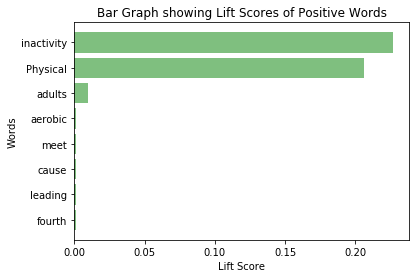

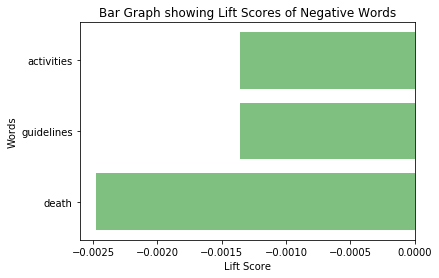

          Word  Lift Score
0     Physical    0.206471
1   inactivity    0.226942
4       fourth    0.001094
5      leading    0.001094
6        cause    0.001094
8        death   -0.002479
9    worldwide    0.000000
14          80    0.000000
17      adults    0.009987
20        meet    0.001094
22  guidelines   -0.001356
25     aerobic    0.001094
28  activities   -0.001356


In [258]:
persona('Physical inactivity is the fourth leading cause of death worldwide, and more than 80% of adults do not meet the guidelines for both aerobic and muscle-strengthening activities')

The above graphs show the positive and negative words in the message and their lift scores. In the first graph, words such as 'physical', 'adults' and 'inactivity' are positive words and increase the overall interest score of the message. In other words, removing these words will give us a lower interest score than the original or baseline score. On the other hand, including words such as 'death', 'guidelines' and 'activities' negatively affect our interest score. Overall, our health persona has approximately 94% similarity with the message. 

The interest score is 0.7268659528404445


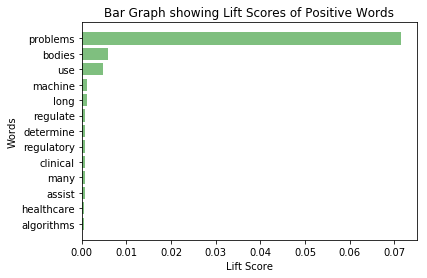

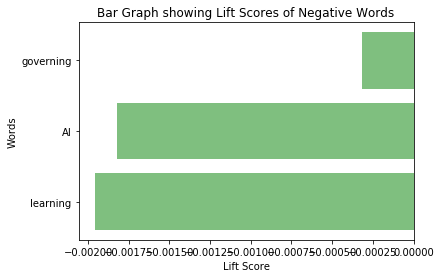

          Word  Lift Score
0           AI   -0.001821
2      machine    0.001259
3     learning   -0.001960
5       assist    0.000616
7         many    0.000616
8     clinical    0.000616
9     problems    0.071414
11        long    0.001249
13   governing   -0.000319
15  regulatory    0.000616
16      bodies    0.005904
18   determine    0.000616
21    regulate    0.000616
23         use    0.004827
25  algorithms    0.000502
27  healthcare    0.000502


In [259]:
persona('AI and machine learning can assist with many clinical problems as long as governing and regulatory bodies can determine how to regulate the use of algorithms in healthcare. ')

The overall interest score of this message with our persona is approx 73%. Including Words such as 'problems', 'bodies' and 'use' positively impact the score, whereas learning, AI, and governing have a negative impact i.e. they reduce the original similarity score.

The interest score is 0.6896653875312722


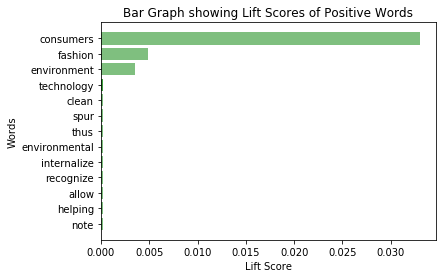

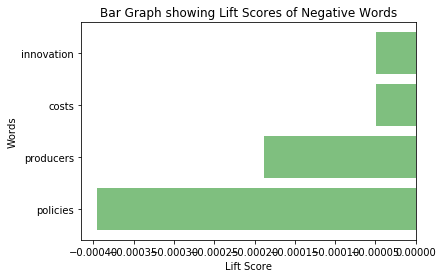

             Word  Lift Score
2            note    0.000213
4      technology    0.000220
6         helping    0.000213
8         fashion    0.004899
9        policies   -0.000396
11          allow    0.000213
12      producers   -0.000189
14      consumers    0.033004
16      recognize    0.000213
18    internalize    0.000213
20  environmental    0.000213
21          costs   -0.000049
23     technology    0.000220
25           thus    0.000213
27           spur    0.000213
28     innovation   -0.000049
30          clean    0.000213
33    environment    0.003523


In [260]:
persona('We then note how technology is helping to fashion policies that allow producers and consumers to recognize and internalize the environmental costs of technology and thus to spur innovation to clean up the environment. .')

The overall similarity score of the above message is approx 69%. Including words such as 'consumers', 'fashion' and 'technology' increase our score, while 'policies', 'producers', 'costs' and 'innovation' have a negative impact indivdually.

The interest score is 0.5314400159523985


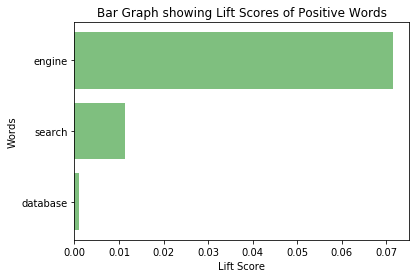

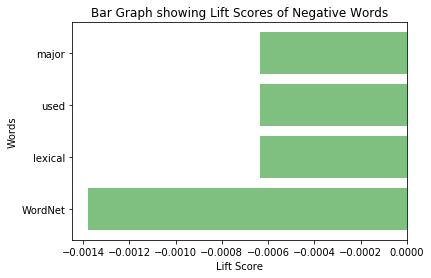

        Word  Lift Score
0    WordNet   -0.001378
3    lexical   -0.000636
4   database    0.001032
8       used   -0.000636
11     major   -0.000636
12    search    0.011375
13    engine    0.071558


In [261]:
persona('WordNet is a lexical database that has been used by a major search engine.')

The above message is based on Word Embeddings topic and, hence, produces a low similarity score of approx 53%. Words such as 'engine' and 'search' have a positive impact, while 'WordNet, 'lexical', 'used' and 'major'have a negative impact on the baseline score.

The interest score is 0.8106892197221836


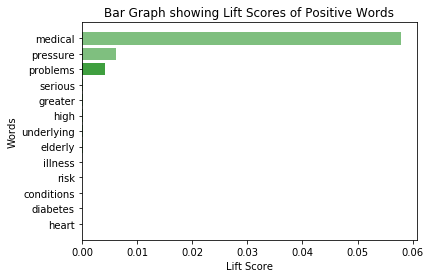

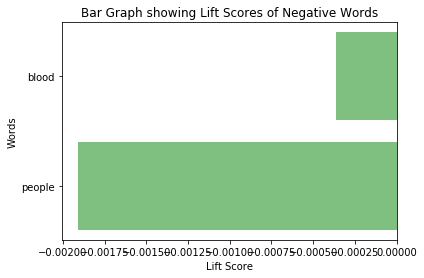

           Word  Lift Score
1       elderly    0.000204
3        people   -0.001911
5    underlying    0.000204
6       medical    0.057853
7      problems    0.004268
8          like    0.000000
9          high    0.000204
10        blood   -0.000366
11     pressure    0.006119
13        heart    0.000033
14     problems    0.004268
16     diabetes    0.000033
19      chronic    0.000000
20  respiratory    0.000000
21   conditions    0.000033
26      greater    0.000204
27         risk    0.000033
29      serious    0.000204
30      illness    0.000033


In [262]:
persona('The elderly and people with underlying medical problems like high blood pressure, heart problems or diabetes, or chronic respiratory conditions, are at a greater risk of serious illness from Covid-19.')

The above message produces a similarity score of approx 81%. Positive words such as 'medical', 'pressure' and 'problems' increase the baseline score. The positive graph represents other words that have positive impact but their significance, measured by their lift scores, is relatively lower than the top three words. On the other hand, words such as 'people' and 'blood' reduce the interest score.

# Conclusion

WordNet, unlike other word embeddings such as Word2Vec, is a knowledge based measure that works on the concept of semantic relevance between words.  It has produced meaningful similarity scores based on each of the message sets and their relevance with the health persona. Word embedding performed using this approach, hence, tends to give us more reliable results than other quantitative measures. There are several similarity measures than can be used to compute semantic relatedness between words, one of which we have explored with Wu & Palmer similarity. However, there's another approach called the Process Model Matching (PMM) which gives more consideration to activity pairs or sentence pairs instead of a word-to-word or word-level approach. This high level similarity approach can, hence, be incorporated on this persona in future.